In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression as LR  # 线性回归
from sklearn.model_selection import train_test_split  # 划分训练测试集
from sklearn.cluster import KMeans
import geopandas as gpd



In [2]:
data = pd.read_csv("./adult_income_obesity.csv")

In [3]:
data = data.dropna(subset=['Median household income (dollars)'],axis = 0)

D:\PyCharm 2023.1\py311-common\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


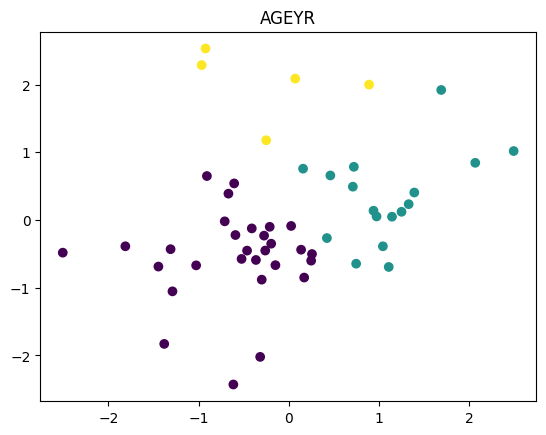

D:\PyCharm 2023.1\py311-common\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


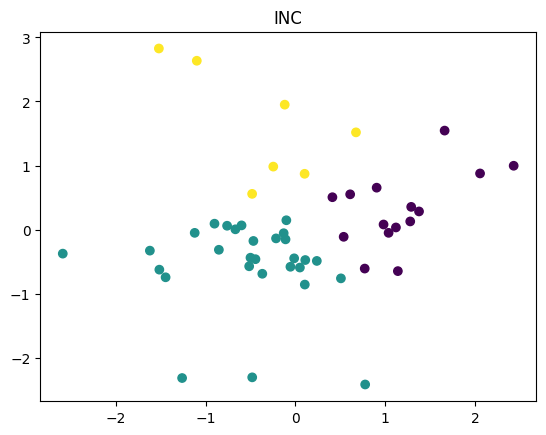

D:\PyCharm 2023.1\py311-common\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


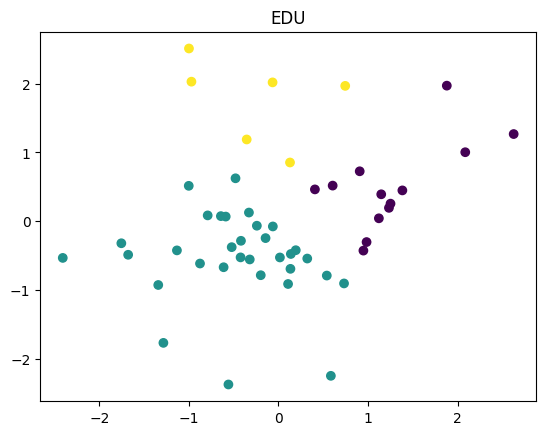

D:\PyCharm 2023.1\py311-common\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


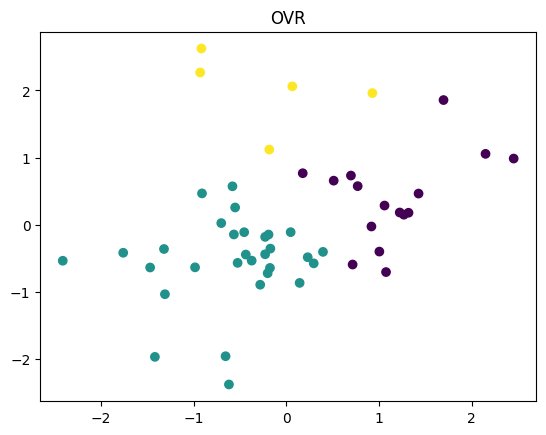

D:\PyCharm 2023.1\py311-common\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


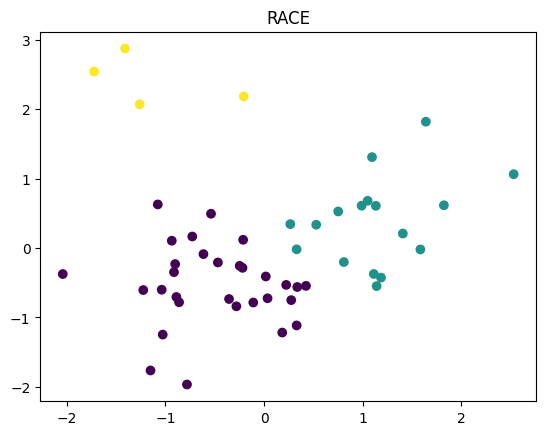

D:\PyCharm 2023.1\py311-common\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


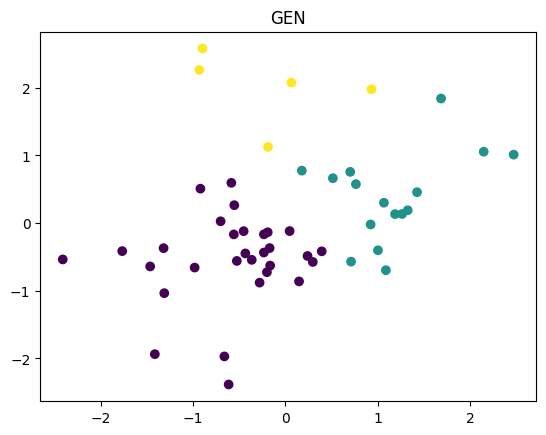

In [4]:
for id in data['adult_StratificationCategoryId1'].unique():
    beta_0, beta_1 = [], []
    data_id = data[data['adult_StratificationCategoryId1'] == id]
    for state in data_id["LocationDesc"].unique():
        if state == "National":
            continue
        # print(state)
        state_data = data_id[data_id["LocationDesc"] == state]
        x = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int) / state_data[
            'Median household income (dollars)'].str.replace(',', '').astype(int)
        sub = (data['Mean household income (dollars)'].str.replace(',', '').astype(int) / data[
            'Median household income (dollars)'].str.replace(',', '').astype(int)).mean()
        std_div = (data['Mean household income (dollars)'].str.replace(',', '').astype(int) / data[
            'Median household income (dollars)'].str.replace(',', '').astype(int)).std()
        x = x - sub
        # print(sub)
        y = state_data['adult_obesity_Value'] 
        reg = LR().fit(x.values.reshape(-1, 1), y)
        beta_0.append(reg.intercept_)
        beta_1.append(reg.coef_[0])
#         print('slope =', reg.coef_[0], ' intercept =', reg.intercept_, 'coef =', np.corrcoef(x, y)[0, 1])
        # print()
    state_list = data_id["LocationDesc"].unique()
    state_geo = data_id["geolocation"].unique()
    beta_0 = (beta_0 - np.mean(beta_0)) / np.std(beta_0)
    beta_1 = (beta_1 - np.mean(beta_1)) / np.std(beta_1)
    df = pd.DataFrame({'state': state_list, 'state_geo': state_geo, 'beta_0': beta_0, 'beta_1': beta_1})
    df.to_csv('state_regr_plot_data.csv')
    k_means = KMeans(n_clusters=3, random_state=0, max_iter=1000).fit(np.array([beta_0, beta_1]).T)
    plt.scatter(beta_0, beta_1, c=k_means.labels_)
    plt.title(id)
    plt.show()

D:\PyCharm 2023.1\py311-common\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


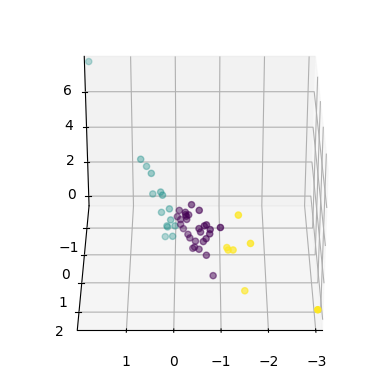

In [5]:
# for id in data['adult_StratificationCategoryId1'].unique():
beta_0, beta_1,beta_2 = [], [],[]
# data_id = data[data['adult_StratificationCategoryId1'] == id]
for state in data["LocationDesc"].unique():
    if state == "National":
        continue
    # print(state)
    state_data = data_id[data_id["LocationDesc"] == state]
    x1 = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int) / state_data[
        'Median household income (dollars)'].str.replace(',', '').astype(int)
    x2 = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int)
    x = pd.DataFrame({'x1':x1.values,'x2':x2.values})
    y = state_data['adult_obesity_Value']/100
    reg = LR().fit(x.values.reshape(-1, 2), y)
    beta_0.append(reg.intercept_)
    beta_1.append(reg.coef_[0])
    beta_2.append(reg.coef_[1])
#     print('slope =', reg.coef_[0], ' intercept =', reg.intercept_, 'coef01 =', np.corrcoef(x.x1, y)[0, 1],'coef02=',np.corrcoef(x.x2,y)[0,1], 'coef12=',np.corrcoef(x.x1,x.x2)[0,1])
    # print()
k_means = KMeans(n_clusters=3, random_state=0, max_iter=10000).fit(np.array([beta_0, beta_1,beta_2]).T)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(beta_0, beta_1, beta_2,c=k_means.labels_)
ax.set_xlim([min(beta_0), max(beta_0)])
ax.set_ylim([min(beta_1), max(beta_1)])
ax.set_zlim([min(beta_2), max(beta_2)])
ax.view_init(elev=30, azim=90)
plt.show()

In [6]:
from scipy.spatial.distance import pdist, squareform

def is_coplanar(points, tolerance=10e-3):
    distances = pdist(points, metric='euclidean')
    gram_matrix = squareform(distances) ** 2
    determinant = np.linalg.det(gram_matrix)
    return abs(determinant) < tolerance

D:\PyCharm 2023.1\py311-common\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


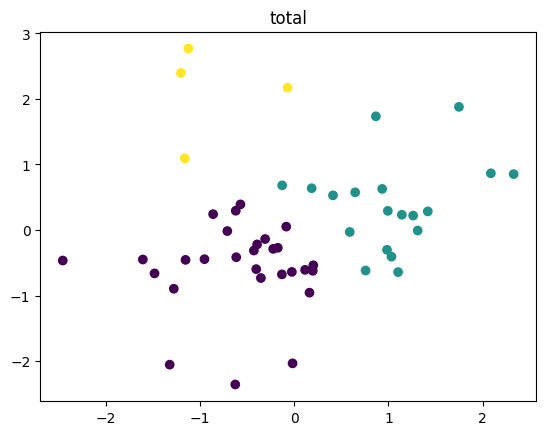

In [7]:

beta_0, beta_1 = [], []
data_id = data
for state in data_id["LocationDesc"].unique():
    if state == "National":
        continue
    # print(state)
    state_data = data_id[data_id["LocationDesc"] == state]
    x = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int) / state_data[
        'Median household income (dollars)'].str.replace(',', '').astype(int)
    sub = (data['Mean household income (dollars)'].str.replace(',', '').astype(int) / data[
        'Median household income (dollars)'].str.replace(',', '').astype(int)).mean()
    std_div = (data['Mean household income (dollars)'].str.replace(',', '').astype(int) / data[
        'Median household income (dollars)'].str.replace(',', '').astype(int)).std()
    x = x - sub
    # print(sub)
    y = state_data['adult_obesity_Value'] 
    reg = LR().fit(x.values.reshape(-1, 1), y)
    beta_0.append(reg.intercept_)
    beta_1.append(reg.coef_[0])
#     print('slope =', reg.coef_[0], ' intercept =', reg.intercept_, 'coef =', np.corrcoef(x, y)[0, 1])
    # print()
state_list = data_id["LocationDesc"].unique()
state_geo = data_id["geolocation"].unique()
beta_0 = (beta_0 - np.mean(beta_0)) / np.std(beta_0)
beta_1 = (beta_1 - np.mean(beta_1)) / np.std(beta_1)
df = pd.DataFrame({'state': state_list, 'state_geo': state_geo, 'beta_0': beta_0, 'beta_1': beta_1})
df.to_csv('state_regr_plot_data.csv')
k_means = KMeans(n_clusters=3, random_state=0, max_iter=1000).fit(np.array([beta_0, beta_1]).T)
plt.scatter(beta_0, beta_1, c=k_means.labels_)
plt.title('total')
plt.show()

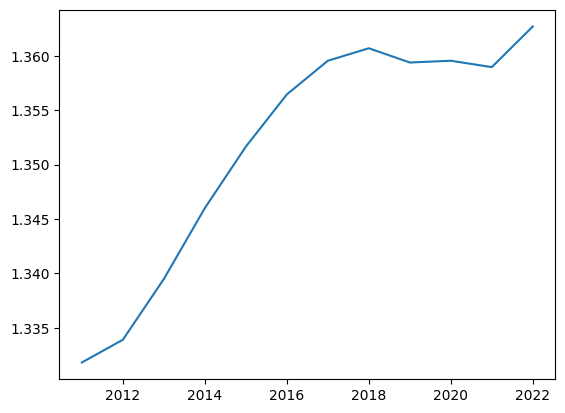

In [8]:
years = data['Year'].unique()
ratios = []
for year in years:
    this_year = data[data['Year'] == year]
    this_ratio = this_year['Mean household income (dollars)'].str.replace(',', '').astype(int) / this_year[
        'Median household income (dollars)'].str.replace(',', '').astype(int)
    this_ratio = this_ratio.mean()
    ratios.append(this_ratio)
plt.plot(years, ratios)
plt.show()

D:\Temp\ipykernel_10776\3764317649.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


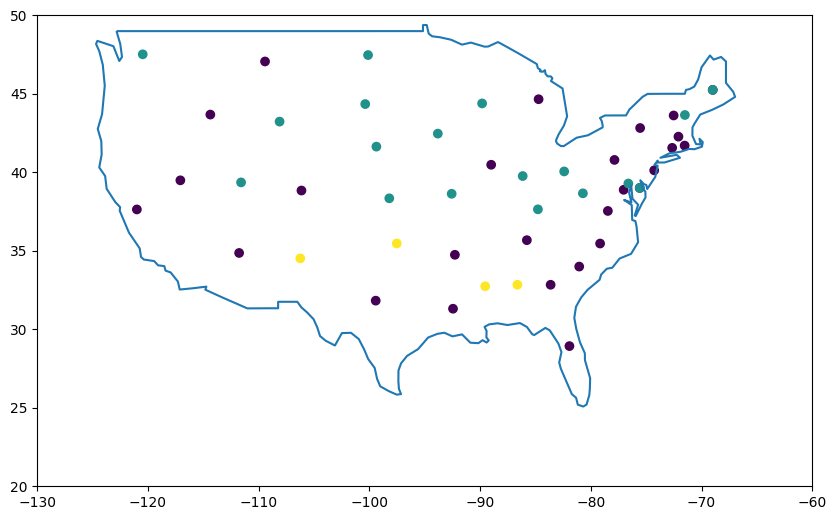

In [9]:
usa = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# print(usa)
states = usa[usa['iso_a3']=='USA']
# print(usa)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
states.boundary.plot(ax=ax)
x, y = zip(*[[float(x) for x in y] for y in df['state_geo'].apply(lambda x: x[1:-1].split(','))])
plt.scatter(y,x, c=k_means.labels_)
plt.xlim(-130, -60)
plt.ylim(20, 50)
plt.show()